In [1]:
import pandas as pd
from scipy.stats.mstats import winsorize
import scipy.stats as stats
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
from sqlalchemy import create_engine
from scipy.stats import boxcox
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from sklearn.preprocessing import scale
from sklearn.preprocessing import normalize
import warnings

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

performance = pd.read_sql_query('select * from studentsperformance',con=engine)

engine.dispose()

1. __Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?__

In [3]:
#inspect data
performance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
#Check for nulls/missing data
performance.isnull().sum()*100/ performance.isnull().count()

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64

In [5]:
performance.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


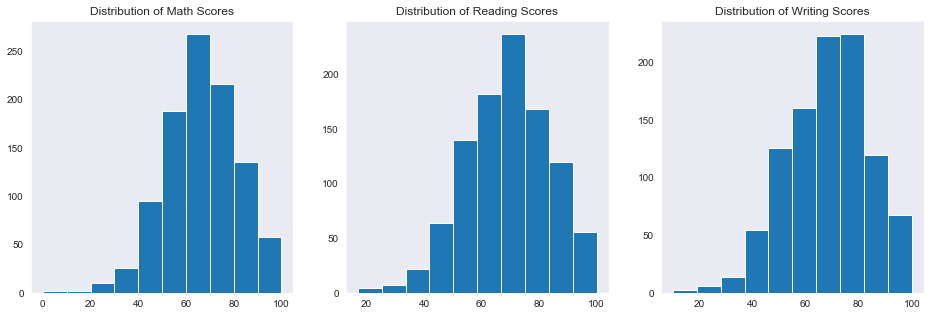

In [6]:
#Plot raw data 
sns.set_style('dark')

plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
plt.hist(performance['math score'])
plt.title('Distribution of Math Scores')
plt.xlim()

plt.subplot(1, 3, 2)
plt.hist(performance['reading score'])
plt.title('Distribution of Reading Scores')

plt.subplot(1, 3, 3)
plt.hist(performance['writing score'])
plt.title('Distribution of Writing Scores')

plt.show()

In [7]:
#Check normalcy 
jb_stats = jarque_bera(performance['math score'])
norm_stats = normaltest(performance['math score'])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(performance['reading score'])
norm_stats = normaltest(performance['reading score'])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(performance['writing score'])
norm_stats = normaltest(performance['writing score'])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 15.912256686712709 and p value is 0.0003505075386818213
Normality test statistics is 15.408960513931822 and p value is 0.00045080293869937836
Jarque-Bera test statistics is 11.383300575987892 and p value is 0.0033740202672214448
Normality test statistics is 11.11741279628622 and p value is 0.003853758403576582
Jarque-Bera test statistics is 13.98509448257235 and p value is 0.0009187033894586527
Normality test statistics is 13.606450837263859 and p value is 0.0011101885439899974


P-values are under 5% threshhold- distributions are not normal, must Box-Cox transform.

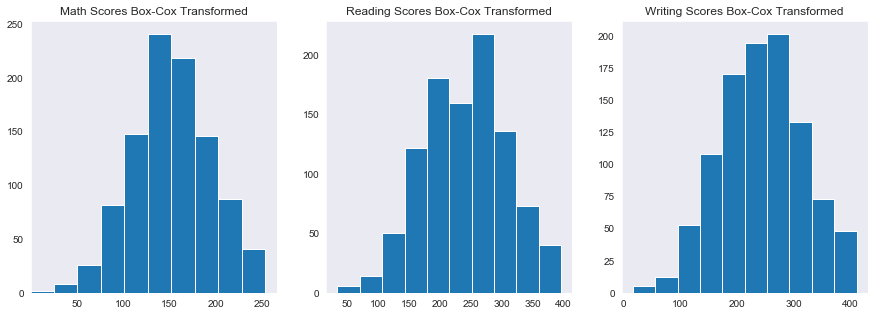

In [8]:
#Box-Cox transform data.
plt.figure(figsize=(15, 5))

#Math scores have a zero value-add constant to Box-Cox transform
math_score_boxcox, _= boxcox(performance['math score'] + 0.001) 
reading_score_boxcox, _= boxcox(performance['reading score']) 
writing_score_boxcox, _= boxcox(performance['writing score']) 

#plot results
plt.subplot(1, 3, 1)
plt.hist(math_score_boxcox)
plt.title('Math Scores Box-Cox Transformed')
plt.xlim(0.0001)

plt.subplot(1, 3, 2)
plt.hist(reading_score_boxcox)
plt.title('Reading Scores Box-Cox Transformed')

plt.subplot(1, 3, 3)
plt.hist(writing_score_boxcox)
plt.title('Writing Scores Box-Cox Transformed')

plt.show()

In [9]:
#Test out newly distributed scores for normal trends
jb_stats = jarque_bera(math_score_boxcox)
norm_stats = normaltest(math_score_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(reading_score_boxcox)
norm_stats = normaltest(reading_score_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(writing_score_boxcox)
norm_stats = normaltest(writing_score_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 1.1161925658667602 and p value is 0.5722975200198401
Normality test statistics is 1.0359443693530312 and p value is 0.59572734901879
Jarque-Bera test statistics is 4.119778573559666 and p value is 0.127468081515408
Normality test statistics is 5.282274606965809 and p value is 0.07128015626992971
Jarque-Bera test statistics is 4.746478090042761 and p value is 0.09317842784043195
Normality test statistics is 6.267311355052559 and p value is 0.04355827085003712


Transformations have normal distributions. 

2. __Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.__

In [10]:
#Create new variable
performance['target']= (performance['math score']+performance['writing score']+performance['reading score'])/3
performance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,target
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [11]:
jb_stats = jarque_bera(performance['target'])
norm_stats = normaltest(performance['target'])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 15.453387913085168 and p value is 0.00044089934264401887
Normality test statistics is 15.186721327231322 and p value is 0.0005037851534494478


New variable is not normally distributed- Box-Cox transformation. 

Text(0.5, 1.0, 'Target variable Box-Cox transformed')

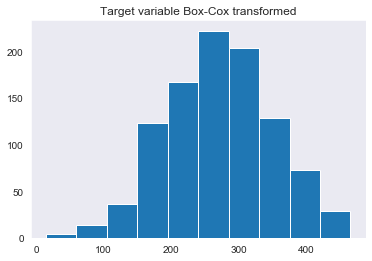

In [12]:
target_boxcox, _ = boxcox(performance['target'])

plt.hist(target_boxcox)
plt.title('Target variable Box-Cox transformed')

In [13]:
jb_stats = jarque_bera(target_boxcox)
norm_stats = normaltest(target_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 2.4353989331279 and p value is 0.2959101356398447
Normality test statistics is 2.779857602227616 and p value is 0.24909303914726724


Newly transformed target has normal distribution. 

3. __Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?__

In [14]:
performance.corr()

,math score,reading score,writing score,target
math score,1.000000,0.817580,0.802642,0.918746
reading score,0.817580,1.000000,0.954598,0.970331
writing score,0.802642,0.954598,1.000000,0.965667
target,0.918746,0.970331,0.965667,1.000000


Of all continuous variables, Reading score has the highest correlation coefficient to the target, so it is very closely related. 

In [15]:
performance.groupby('gender').mean()

,math score,reading score,writing score,target
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


In [16]:
print(stats.ttest_ind(performance[performance['gender'] == 'female']['target'], 
               performance[performance['gender'] == 'male']['target']))

Ttest_indResult(statistic=4.169913529142, pvalue=3.311973638243664e-05)


Females perform significantly better than males overall-this could affect exam success.

<BarContainer object of 2 artists>

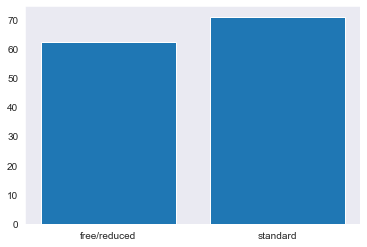

In [17]:
plt.bar(performance.groupby('lunch')
        ['target'].mean().index, performance.groupby('lunch')['target'].mean())

The two groups demonstrate a difference in exam scores, but there may be other factors influencing the lunch type.

<BarContainer object of 5 artists>

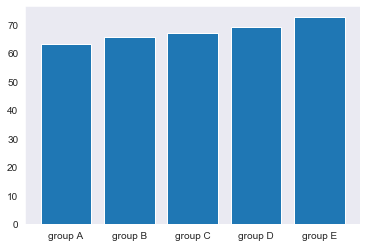

In [18]:
plt.bar(performance.groupby('race/ethnicity')
        ['target'].mean().index, performance.groupby('race/ethnicity')['target'].mean())

Race/ethnicity groups have a positive correlation, so they may be useful in explaining exam success. 

In [19]:
performance.groupby('lunch').mean()

,math score,reading score,writing score,target
lunch,,,,
free/reduced,58.921127,64.653521,63.022535,62.199061
standard,70.034109,71.654264,70.823256,70.837209


In [20]:
performance.groupby('test preparation course').mean()

,math score,reading score,writing score,target
test preparation course,,,,
completed,69.695531,73.893855,74.418994,72.669460
none,64.077882,66.534268,64.504673,65.038941


In [21]:
#Run t-test to check significant difference
print(stats.ttest_ind(performance[performance['test preparation course'] == 'completed']['target'], 
               performance[performance['test preparation course'] == 'none']['target']))

Ttest_indResult(statistic=8.390944443482592, pvalue=1.633780203592351e-16)


Text(0.5, 1.0, 'Exam averages by parental level of education')

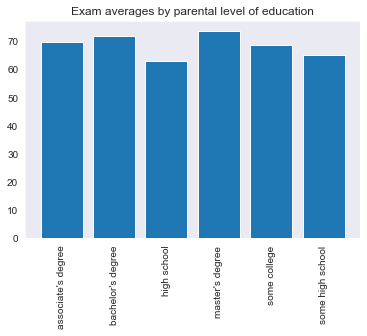

In [22]:
#Plot exams by parental education
plt.bar(performance.groupby('parental level of education')
        ['target'].mean().index, performance.groupby('parental level of education')['target'].mean())
plt.xticks(rotation='vertical')
plt.title('Exam averages by parental level of education')

This variable may also be useful in explaining exam success, as it positively correlates with higher parental education. In summary, all variables may potentially be useful in determining exam success. 